# **Final Project : Financial Developement and Structure Research**

The Financial Development and Structure data set is put togegther collaboratively by authours from World Bank, UC Berkeley and Tilburg University, Netherlands. The dataset was updated on November 2013. 


This data set contains:
* 10557 rows and 36 columns 
* coverage of 204 countries across 8 regions
* coverage from year 1997 to year 2011, if applicable
* Topics such as bank concentration numbers, size of stock market as compared to GDP, liquid liabilities to GDP (%)

Link to data source: https://datacatalog.worldbank.org/dataset/wps2146-financial-development-and-structure



In this notebook, we'll first explore the regions with basic details. Then, we'll explore data points below to understand the financial developement in specific countries:
* Central Bank Assets to GDP (%)
* Bank Concetration
* Consumer Savings Habits



In [101]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline
finData = pd.read_csv('Fin_Structure.csv') 

# To explore the details of this dataset

A few queries that show the basic details of this dataset

In [0]:
finData.shape  #(10557,36)      
finData.columns    # Prints out the list of column

# To find out the number of unique countries
unique_countries = pd.DataFrame(finData.groupby('COUNTRY').nunique()) # 204 countries 


# Number of countries represented in each region

In [103]:
unique_countries = finData['COUNTRY'].unique()
unique_countries_df = pd.DataFrame(unique_countries)

# print(unique_countries_df)

unique_countries_by_region = pd.DataFrame(finData.groupby('WB REGION').COUNTRY.nunique())
unique_countries_by_region = unique_countries_by_region.drop(['region'])
unique_countries_by_region

,COUNTRY
WB REGION,
East Asia and Pacific,24
Europe and Central Asia,23
High-income OECD members,31
High-income nonOECD members,29
Latin America & the Caribbean,29
Middle East and North Africa,13
South Asia,8
Sub-Saharan Africa,46


# Graph of countries in each region (Question, how to add graph next to table)

**[How to plot table next to graph](https://stackoverflow.com/questions/45286696/how-to-display-dataframe-next-to-plot-in-jupyter-notebook)**

Text(0.5, 1.0, 'Number of countries in each Region')

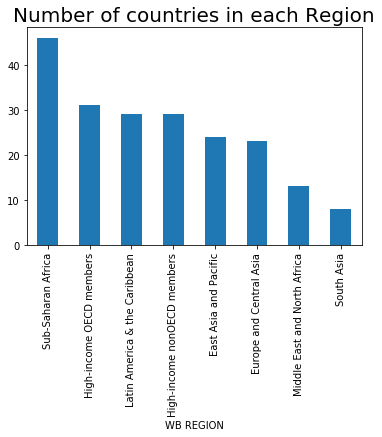

In [0]:
# Creating a bar graph to show numbers of country in each region, sorted in desc order
No_of_countries_by_Region = unique_countries_by_region['COUNTRY'].sort_values(ascending=False).plot(kind = 'bar');
No_of_countries_by_Region.set_title('Number of countries in each Region',fontsize = 20)

# Income Distribution in Each Region

Text(0.5, 0.98, 'Income distribution for each Region')

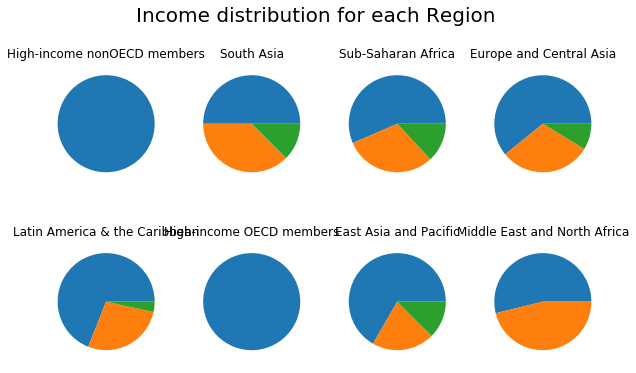

In [0]:
def get_pie_per_region(region_name, findData, ax):
  EAP = finData[finData['WB REGION'] == region_name]
  EAP_INCOME_GROUP = EAP[["COUNTRY","WB INCOME GROUP"]]
  EAP_INCOME_GROUP_UNIQUE = EAP_INCOME_GROUP.drop_duplicates()


  count = EAP_INCOME_GROUP_UNIQUE["WB INCOME GROUP"].value_counts()
  ax.pie(pd.DataFrame(count)['WB INCOME GROUP'])
#   pd.DataFrame(count).plot(kind = 'pie',y='WB INCOME GROUP')
  
Unique_Region = finData[["WB REGION"]].drop_duplicates().drop([0])

fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for i, (region, row) in enumerate(Unique_Region.set_index('WB REGION').iterrows()):
    x = 1 if i > 3 else 0
    ax = axes[x, i % 4]
    get_pie_per_region(region, finData, ax)
    ax.set_title(region)

fig.suptitle('Income distribution for each Region',fontsize = 20)


# United States & China : Central Bank Assets to GDP (%)

Text(0.5, 1.0, 'US Central Bank Assets to GDP (%)')

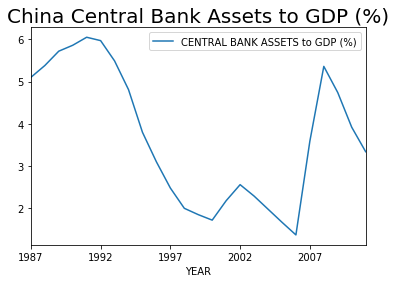

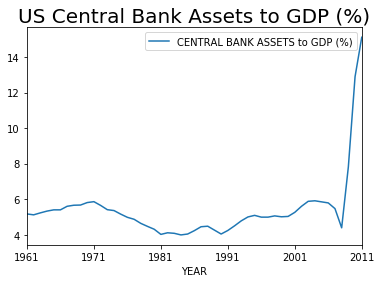

In [0]:
China = finData[finData['WB COUNTRY CODE'] == 'CHN']
CountryDeposit = pd.DataFrame(China[["YEAR","CENTRAL BANK ASSETS to GDP (%)"]])
# CountryDeposit = CountryDeposit.drop([1769])
CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"] = CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"].apply(lambda x: float(x))
x = CountryDeposit[CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"].notnull()].plot(kind = 'line',x="YEAR",y="CENTRAL BANK ASSETS to GDP (%)")
x.set_title('China Central Bank Assets to GDP (%)',fontsize = 20)

USA = finData[finData['WB COUNTRY CODE'] == 'USA']
CountryDeposit2 = pd.DataFrame(USA[["YEAR","CENTRAL BANK ASSETS to GDP (%)"]])
# CountryDeposit = CountryDeposit2.drop([1769])
CountryDeposit2["CENTRAL BANK ASSETS to GDP (%)"] = CountryDeposit2["CENTRAL BANK ASSETS to GDP (%)"].apply(lambda x: float(x))
y = CountryDeposit2[CountryDeposit2["CENTRAL BANK ASSETS to GDP (%)"].notnull()].plot(kind = 'line',x="YEAR",y="CENTRAL BANK ASSETS to GDP (%)")
y.set_title('US Central Bank Assets to GDP (%)',fontsize = 20)

**Summary Analysis**

* Comparing China's and USA Central Bank Assets to GDP, it shows the strength of US Central Bank and the role it plays in the economy. 
* United states central bank also significantly increase their Central Bank Asset in the midst of the 2007 crisis to expand it's influence (and to stabalize) the financial system

# BANK CONCENTRATION (USA, INDIA, CHINA)

**Defination**: Assets of three largest banks as a share of assets of all commercial banks. 

**Why** : Bank concentration shows the story of how concentrated the assets are among the financial isntituion. Concentration risk arise when concentration of single counterparty, sector or country. The risk arise from the abservation of that assets are less diverse and and finciancial system failure might be more correlated.

**What** : Exploring the bank concentration for this trifecta 

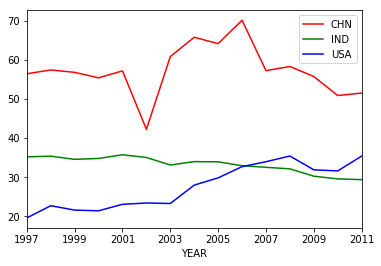

In [0]:
def plot_multi(country_codes):
  
  fig, ax = plt.subplots()
  for cc, color in country_codes:
    country = finData[finData['WB COUNTRY CODE'] == cc]
    BankConcentration = pd.DataFrame(country[["YEAR","BANK CONCENTRATION (%)"]])
    BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
    ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c=color, label=cc)

  plt.legend(loc='best')
  plt.show()

plot_multi([('CHN', 'red'), ('IND','green'), ('USA', 'blue')])

# China = finData[finData['WB COUNTRY CODE'] == 'CHN']
# BankConcentration = pd.DataFrame(China[["YEAR","BANK CONCENTRATION (%)"]])
# BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
# ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c='red', label='CHN')


# India = finData[finData['WB COUNTRY CODE'] == 'IND']
# BankConcentration = pd.DataFrame(India[["YEAR","BANK CONCENTRATION (%)"]])
# BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
# ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c='blue', label='IND')


# USA = finData[finData['WB COUNTRY CODE'] == 'USA']
# BankConcentration = pd.DataFrame(USA[["YEAR","BANK CONCENTRATION (%)"]])
# BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
# ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c='green', label='IND')

# plt.legend(loc='best')
# plt.show()

# BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(kind = 'line',x="YEAR",y="BANK CONCENTRATION (%)",title = "Bank Concentration")

**Summary Analysis**: 


*   China: High concentration of assets, remains at an average that the top 3 banks hold ~60%
*   USA: In 1997, top 3 banks only hold 20% of financial assets of the whole ecosystem. Over the period of 15 years, this number has doubled and the top 3 banks holds 40% of the financial asset
*   India: Remained relatively steady from 1997 to 2011



# Deep dive into Asia Fin Structure:  Hong Kong 🇭🇰, Singapore 🇸🇬, and Japan 🇯🇵

This section analyzing the concentration risk among the top three most developed banking system in Asia. Surprisingly, all three of them shows drastic differences. 

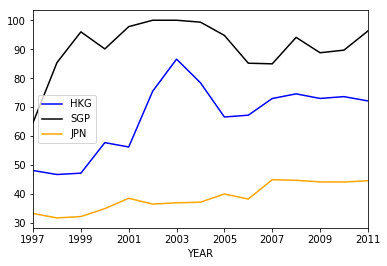

In [0]:

def plot_multi(country_codes):
  
  fig, ax = plt.subplots()
  for cc, color in country_codes:
    country = finData[finData['WB COUNTRY CODE'] == cc]
    BankConcentration = pd.DataFrame(country[["YEAR","BANK CONCENTRATION (%)"]])
    BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
    ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c=color, label=cc)

  plt.legend(loc='best')
  plt.show()

plot_multi([('HKG', 'blue'), ('SGP', 'black'), ('JPN', 'orange')])


**Summary Analysis**

* The graph above is interesting because although Japan, Hong Kong, and Singaprore are both developed country in Asia, there is a huge difference between the concentration of bank assets in those two countries.

*  Singapore has the highest concentration risk. With high % of assets in the top 3 banks, the financial interdependency and connectedness risk is high. 3 key players = harder for market entry

* On the other hand, Japanese banking market is scatter and there are more institutions. No major player. Good opportunity for Neobanks and banking startups.


# DEPOSIT MONEY BANK ASSETS to GDP (%)

**Defination**: saving deposits in deposit money banks as a share of GDP over time from IMF

**Why**: DEPOSIT MONEY BANK ASSETS to GDP (%) shows consumer behaviour in different culture. The question of "Do consumer prefer to save or spend" provide insights into retail and marketing decisions as well as how challenging it will be to consumer if there is another financial crisis.


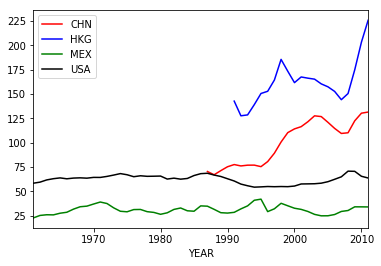

In [104]:
invalidYearIndex = finData[finData["YEAR"] == 'year'].index
finData = finData.drop(invalidYearIndex)
finData["YEAR"] = finData["YEAR"].apply(lambda x: int(x))
def plot_multi(country_codes):
  
  fig, ax = plt.subplots()
  for cc, color in country_codes:
    country = finData[finData['WB COUNTRY CODE'] == cc]
    BankConcentration = pd.DataFrame(country[["YEAR","DEPOSIT MONEY BANK ASSETS to GDP (%)"]])
    BankConcentration["DEPOSIT MONEY BANK ASSETS to GDP (%)"] = BankConcentration["DEPOSIT MONEY BANK ASSETS to GDP (%)"].apply(lambda x: float(x))
    ax = BankConcentration[BankConcentration["DEPOSIT MONEY BANK ASSETS to GDP (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='DEPOSIT MONEY BANK ASSETS to GDP (%)', c=color, label=cc)

  plt.legend(loc='best')
  plt.show()

plot_multi([('CHN', 'red'), ('HKG', 'blue'),('MEX','green'),('USA','black')])


**Summary Analysis**

*   Comparing HKG to CHN, HKG deposit money bank asset to GDP is much higher than CHN. This number is a function of GDP and a much larger population in CHN indicates that wealth is more concentrated in HKG. 

* Comparing MEX & USA versus HKG & CHN. MEX & USA looks to be steady while HKG & CHN had just shy below from doubling the consumr savings rate. This economic growth and expansion from 1990-2010 could a driver for the increase. Further, the number in MEX & USA remains steady with a slight increase for USA in 2009. The first thing that comes to mind is that consumer probably started saving more during the crisis but this increase was intermitten.  




# Conclusion

The three data points we explore represented the different sector of financial system as a measure of financial development. We looked into the role of Central Bank by virtue of *Central Bank Assets to GDP (%)*, the collective role of all the financial institutions, i.e. *Bank Concentration*, and the role of consumer thorugh *Deposit Money Bank Assests to GDP (%)*. these data points each tells a story for the country as well as the region as we traverse through time.


